In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('train_values.csv')
data.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 21 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-null float64
ffiecmedian_family_income         477560 

## summary statistics for the data

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_type,500000.0,1.366276,0.690555,1.000,1.00000,1.000,2.00,4.0
property_type,500000.0,1.047650,0.231404,1.000,1.00000,1.000,1.00,3.0
loan_purpose,500000.0,2.066810,0.948371,1.000,1.00000,2.000,3.00,3.0
occupancy,500000.0,1.109590,0.326092,1.000,1.00000,1.000,1.00,3.0
loan_amount,500000.0,221.753158,590.641648,1.000,93.00000,162.000,266.00,100878.0
preapproval,500000.0,2.764722,0.543061,1.000,3.00000,3.000,3.00,3.0
msa_md,500000.0,181.606972,138.464169,-1.000,25.00000,192.000,314.00,408.0
state_code,500000.0,23.726924,15.982768,-1.000,6.00000,26.000,37.00,52.0
county_code,500000.0,144.542062,100.243612,-1.000,57.00000,131.000,246.00,324.0
applicant_ethnicity,500000.0,2.036228,0.511351,1.000,2.00000,2.000,2.00,4.0


In [5]:
data.isnull().values.any()

True

In [6]:
data.fillna(0,inplace=True)

# Exploratory Data Analysis

The histogram plot for the whole data was not displaying well beacuse majority of the applicants applied for loan loer than 1000 dollars. hence, a histogram plot to leverage the majority of applicants' loan amount as plotted. 

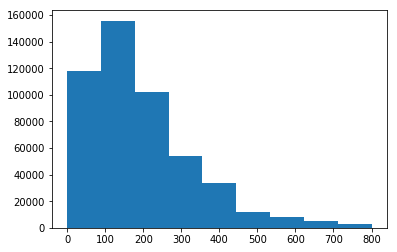

In [7]:
bins = np.linspace(0, 800, 10)
y = data['loan_amount']

plt.hist(y, bins)


plt.show()

In [3]:
data2= pd.read_csv('train_data.csv')
data2.fillna(0,inplace=True)

In [9]:
data2.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
row_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,70,3,18,37,246,2,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,3,1,178,3,369,52,299,1,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,1,3,1,163,3,16,10,306,2,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,1,1,1,1,155,1,305,47,180,2,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,1,1,1,1,305,3,24,37,20,2,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


## Checking for class Imbalance 

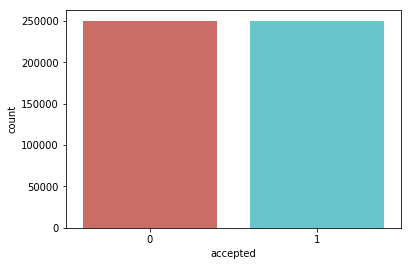

1    250114
0    249886
Name: accepted, dtype: int64

In [21]:
sns.countplot(x='accepted',data=data2, palette='hls')
plt.show()
data2['accepted'].value_counts()

In [22]:
count_no_defaulters = len(data2[data2['accepted']==0])
count_defaulters = len(data2[data2['accepted']==1])
pct_of_no_defaulters = count_no_defaulters/(count_no_defaulters+count_defaulters)
print("percentage of denied applications", pct_of_no_defaulters*100)
pct_of_defaulters = count_defaulters/(count_no_defaulters+count_defaulters)
print("percentage of accepted applications", pct_of_defaulters*100)

percentage of denied applications 49.977199999999996
percentage of accepted applications 50.022800000000004


### The use of Pandas "Crosstab" for effective plotting and tabular visualization of the categorical features

Text(0,0.5,'Counts of clients')

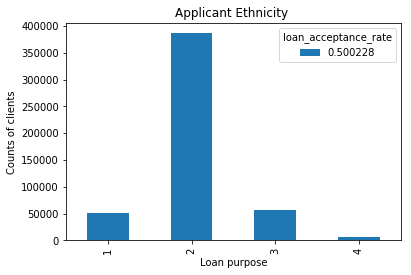

In [32]:
%matplotlib inline
pd.crosstab(data2.applicant_ethnicity,data2.loan_acceptance_rate).plot(kind='bar')
plt.title('Applicant Ethnicity ')
plt.xlabel('Loan purpose')
plt.ylabel('Counts of clients')

Text(0.5,1,'Loan Acceptance counts by Applicant Ethnicity ')

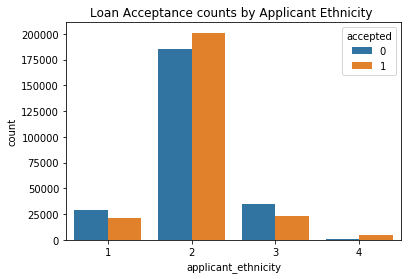

In [34]:
sns.countplot(x= 'applicant_ethnicity', hue= 'accepted', data = data2)
plt.title('Loan Acceptance counts by Applicant Ethnicity ')

Text(0.5,1,'Loan Acceptance Rate by State code')

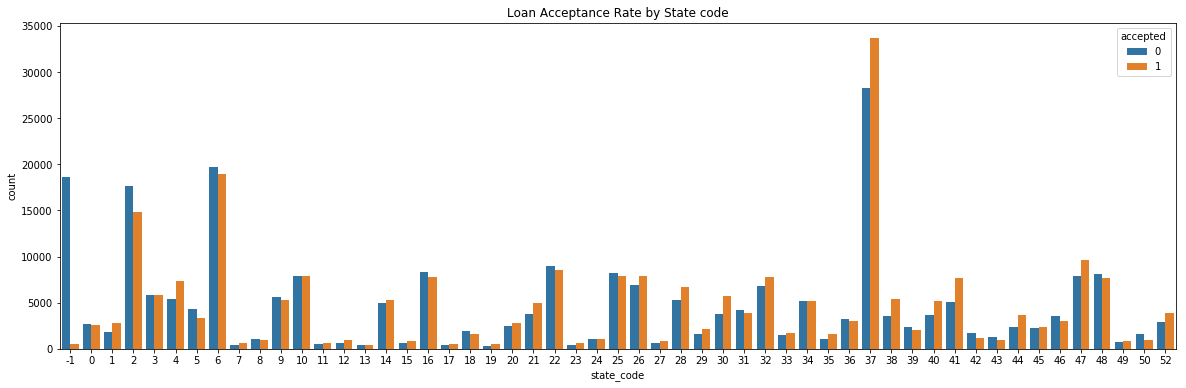

In [30]:
fig, ax = plt.subplots(figsize=(20,6))
sns.countplot(x= 'state_code', hue= 'accepted', data = data2)
plt.title('Loan Acceptance Rate by State code')

Text(0,0.5,'Counts of clients')

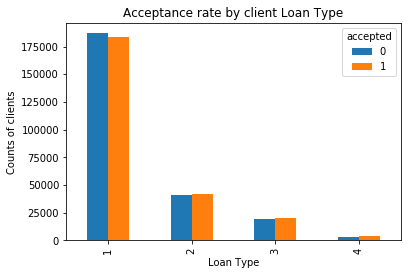

In [22]:
%matplotlib inline
pd.crosstab(data2.loan_type,data2.accepted).plot(kind='bar')
plt.title('Acceptance rate by client Loan Type')
plt.xlabel('Loan Type')
plt.ylabel('Counts of clients')

In [90]:
pd.crosstab(data2.loan_type,data2.accepted,margins=True)

accepted,0,1,All
loan_type,,,
1,186916,183911,370827
2,40792,41638,82430
3,19008,20513,39521
4,3170,4052,7222
All,249886,250114,500000


Text(0,0.5,'Counts of clients')

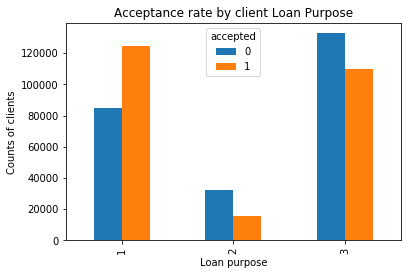

In [23]:
%matplotlib inline
pd.crosstab(data2.loan_purpose,data2.accepted).plot(kind='bar')
plt.title('Acceptance rate by client Loan Purpose')
plt.xlabel('Loan purpose')
plt.ylabel('Counts of clients')

In [91]:
pd.crosstab(data2.loan_purpose,data2.accepted,margins=True)

accepted,0,1,All
loan_purpose,,,
1,84874,124391,209265
2,32243,15822,48065
3,132769,109901,242670
All,249886,250114,500000


Text(0,0.5,'Counts of clients')

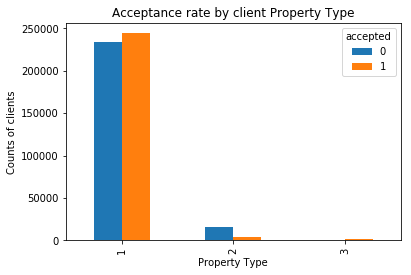

In [24]:
%matplotlib inline
pd.crosstab(data2.property_type,data2.accepted).plot(kind='bar')
plt.title('Acceptance rate by client Property Type')
plt.xlabel('Property Type')
plt.ylabel('Counts of clients')

In [92]:
pd.crosstab(data2.property_type,data2.accepted,margins=True)

accepted,0,1,All
property_type,,,
1,233960,244257,478217
2,15282,4459,19741
3,644,1398,2042
All,249886,250114,500000


Text(0,0.5,'Counts of clients')

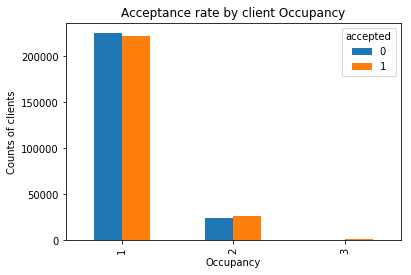

In [25]:
%matplotlib inline
pd.crosstab(data2.occupancy,data2.accepted).plot(kind='bar')
plt.title('Acceptance rate by client Occupancy')
plt.xlabel('Occupancy')
plt.ylabel('Counts of clients')

In [93]:
pd.crosstab(data2.occupancy,data2.accepted,margins=True)

accepted,0,1,All
occupancy,,,
1,225069,222325,447394
2,24046,26371,50417
3,771,1418,2189
All,249886,250114,500000


Text(0,0.5,'Counts of clients')

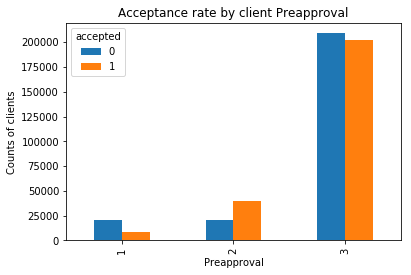

In [26]:
%matplotlib inline
pd.crosstab(data2.preapproval,data2.accepted).plot(kind='bar')
plt.title('Acceptance rate by client Preapproval')
plt.xlabel('Preapproval')
plt.ylabel('Counts of clients')

In [94]:
pd.crosstab(data2.preapproval,data2.accepted,margins=True)

accepted,0,1,All
preapproval,,,
1,20226,8522,28748
2,20677,39466,60143
3,208983,202126,411109
All,249886,250114,500000


Text(0,0.5,'Counts of clients')

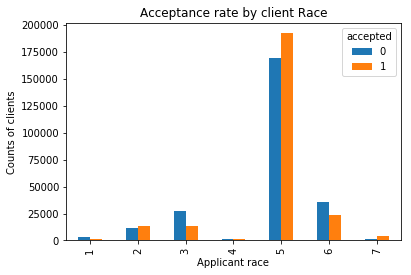

In [27]:
%matplotlib inline
pd.crosstab(data2.applicant_race,data2.accepted).plot(kind='bar')
plt.title('Acceptance rate by client Race')
plt.xlabel('Applicant race')
plt.ylabel('Counts of clients')

In [95]:
pd.crosstab(data2.applicant_race,data2.accepted,margins=True)

accepted,0,1,All
applicant_race,,,
1,2877,1455,4332
2,11930,13826,25756
3,27318,13177,40495
4,1356,983,2339
5,169230,192308,361538
6,36012,23850,59862
7,1163,4515,5678
All,249886,250114,500000


Text(0,0.5,'Counts of clients')

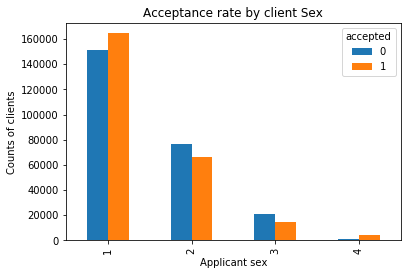

In [28]:
%matplotlib inline
pd.crosstab(data2.applicant_sex,data2.accepted).plot(kind='bar')
plt.title('Acceptance rate by client Sex')
plt.xlabel('Applicant sex')
plt.ylabel('Counts of clients')

In [89]:
# Clusters Grouped by Genders
#unique_customers = data2['applicant_sex'].apply(pd.Series.value_counts).reset_index()
#unique_customers

# Now we can create a cross-tabulation table, which is basically just a frequency table
pd.crosstab(data2.applicant_sex,data2.accepted,margins=True)

accepted,0,1,All
applicant_sex,,,
1,151327,164479,315806
2,76231,66645,142876
3,21170,14473,35643
4,1158,4517,5675
All,249886,250114,500000


Text(0,0.5,'Counts of clients')

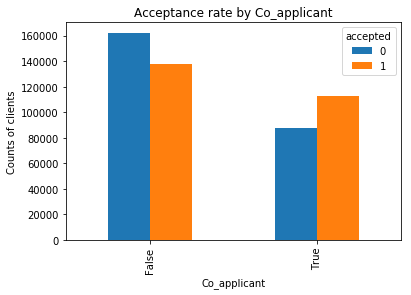

In [34]:
%matplotlib inline
pd.crosstab(data2.co_applicant,data2.accepted).plot(kind='bar')
plt.title('Acceptance rate by Co_applicant')
plt.xlabel('Co_applicant')
plt.ylabel('Counts of clients')

In [96]:
pd.crosstab(data2.co_applicant,data2.accepted,margins=True)

accepted,0,1,All
co_applicant,,,
False,162303,137671,299974
True,87583,112443,200026
All,249886,250114,500000


### Box plots

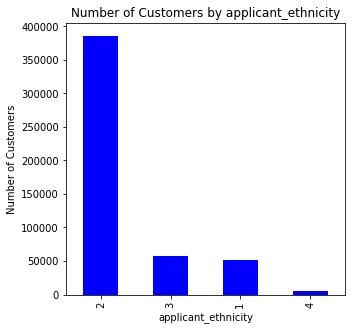

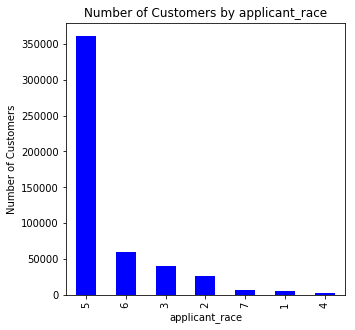

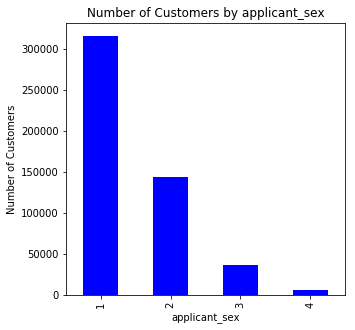

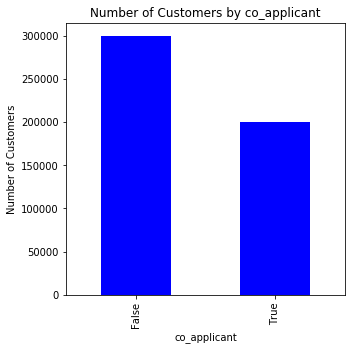

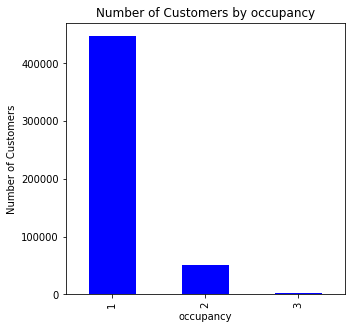

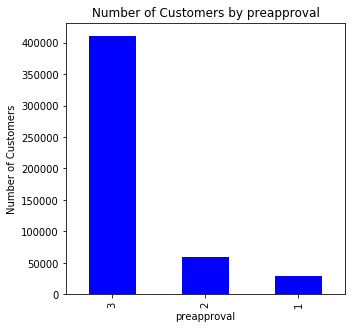

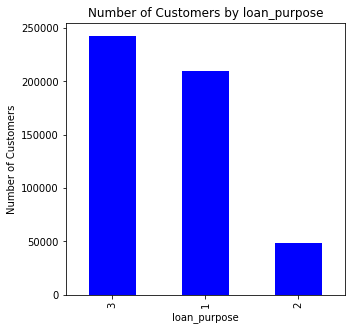

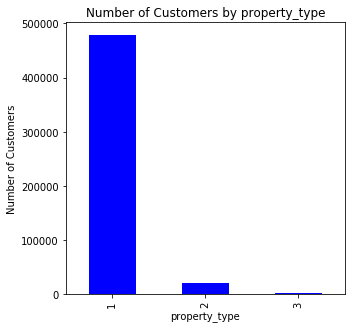

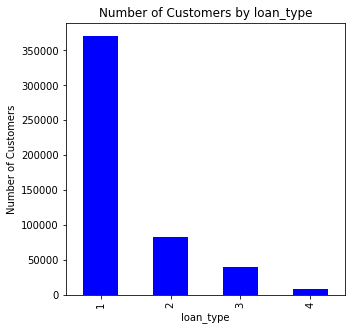

In [47]:
#Analysis of personal categorical information

def plot_bars(Customers, cols):
    for col in cols:
        fig = plt.figure(figsize=(5,5)) # define plot area
        ax = fig.gca() # define axis    
        counts = data2[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of Customers by' + ' ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Customers')# Set text for y axis
        plt.show()

plot_cols = ['applicant_ethnicity','applicant_race','applicant_sex','co_applicant','occupancy','preapproval','loan_purpose','property_type','loan_type']
plot_bars('Customers', plot_cols)   

C:\Users\maria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


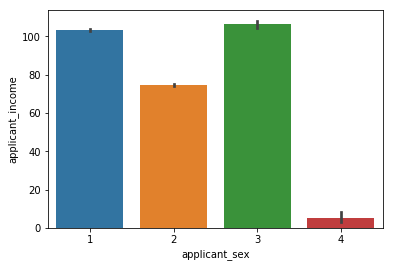

In [35]:
sns.barplot(x='applicant_sex',y='applicant_income',data=data2,estimator=np.mean)

### Analysis of Numerical features

In [100]:
print(data2['applicant_income'].max())
print(data2['applicant_income'].mean())
print(data2['loan_amount'].max())
print(data2['loan_amount'].mean())

10139.0
94.209008
100878
221.753158


In [102]:
grouping = data2.groupby('accepted')

In [103]:
# Mean, Minimum and Maximum of features that might be important, aswell as their count
grouping.agg({
    'applicant_income': ['mean','min','max'],
    'loan_amount': ['mean','min','max'],
    'number_of_owner-occupied_units': ['mean','min','max'],
    'number_of_1_to_4_family_units': ['mean','min','max'],
    'ffiecmedian_family_income': ['mean','min','max','count'],
      }).round(1)

applicant_income               loan_amount              \
                     mean  min      max        mean min     max   
accepted                                                          
0                    84.1  0.0  10139.0       194.4   1  100878   
1                   104.3  0.0  10109.0       249.1   1  100333   

         number_of_owner-occupied_units               \
                                   mean  min     max   
accepted                                               
0                                1278.9  0.0  8761.0   
1                                1447.6  0.0  8771.0   

         number_of_1_to_4_family_units                \
                                  mean  min      max   
accepted                                               
0                               1717.9  0.0  13599.0   
1                               1884.3  0.0  13623.0   

         ffiecmedian_family_income                         
                              mean  min       max   count  
accepted                                                   
0                          62320.3  0.0  125172.0  249886  
1                          69932.8  0.0  125248.0  250114

C:\Users\maria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean Applicant Income grouped according to acceptance rate ')

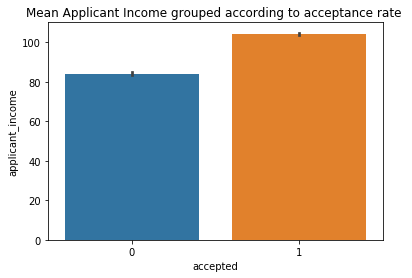

In [101]:
sns.barplot(x='accepted',y='applicant_income',data=data2)
plt.title('Mean Applicant Income grouped according to acceptance rate ')

C:\Users\maria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Maximum Applicant Income grouped according to acceptance rate ')

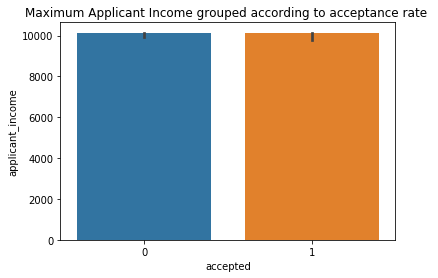

In [98]:
sns.barplot(x='accepted',y='applicant_income',data=data2, estimator=np.max)
plt.title('Maximum Applicant Income grouped according to acceptance rate ')

C:\Users\maria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Mean Loan amount grouped according to acceptance rate')

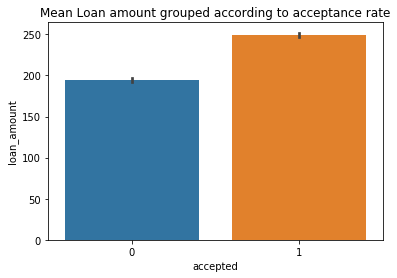

In [99]:
sns.barplot(x='accepted',y='loan_amount',data=data2, estimator = np.mean)
plt.title('Mean Loan amount grouped according to acceptance rate')

C:\Users\maria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Maximum Loan amount according to acceptance rate')

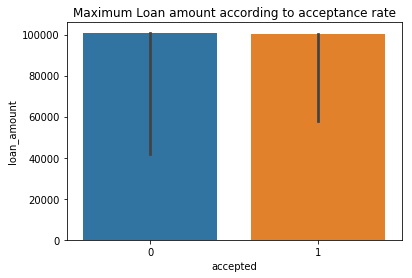

In [64]:
sns.barplot(x='accepted',y='loan_amount',data=data2, estimator= np.max)
plt.title('Maximum Loan amount according to acceptance rate')

C:\Users\maria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Number of owner occupied units grouped according to acceptance rate')

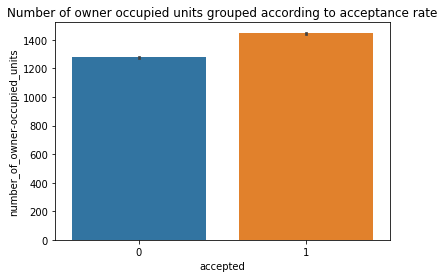

In [65]:
sns.barplot(x='accepted',y='number_of_owner-occupied_units',data=data2)
plt.title('Number of owner occupied units grouped according to acceptance rate' )

C:\Users\maria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Number of 1 to 4 family units grouped according to acceptance rate')

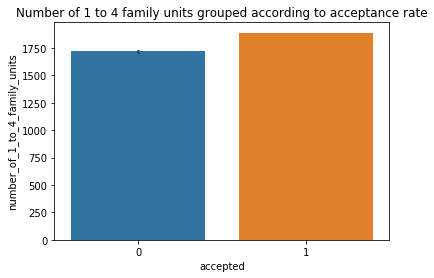

In [60]:
sns.barplot(x='accepted',y='number_of_1_to_4_family_units',data=data2)
plt.title('Number of 1 to 4 family units grouped according to acceptance rate')

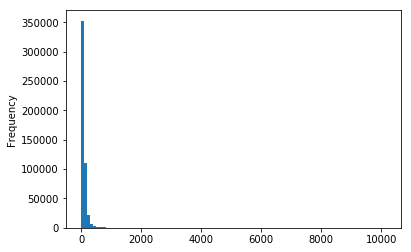

In [52]:
data2['applicant_income'].plot.hist(bins= 100)

C:\Users\maria\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


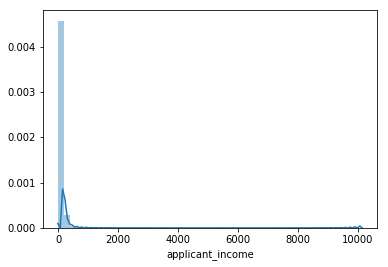

In [46]:
sns.distplot(data2['applicant_income'])

### Use of groupby and bar plots for better visualizations of numerical features

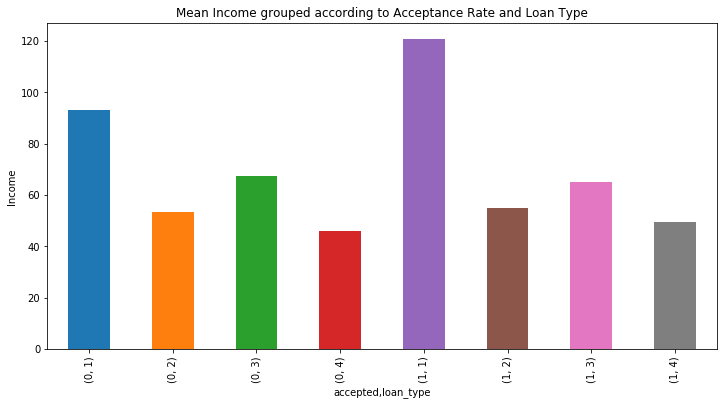

In [70]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','loan_type']).mean()['applicant_income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Acceptance Rate and Loan Type');

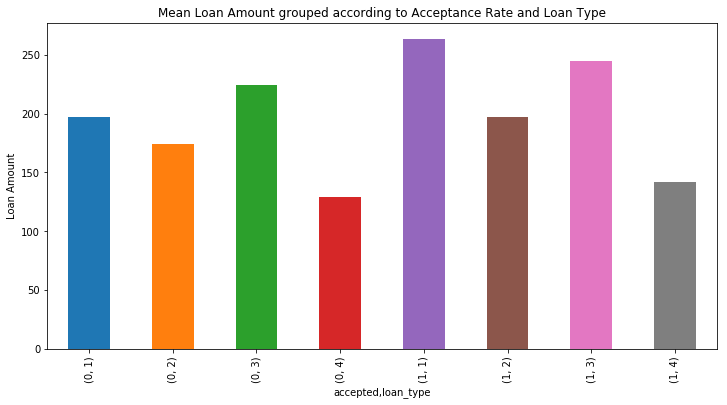

In [76]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','loan_type']).mean()['loan_amount'].plot(ax=ax, kind='bar')
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount grouped according to Acceptance Rate and Loan Type');

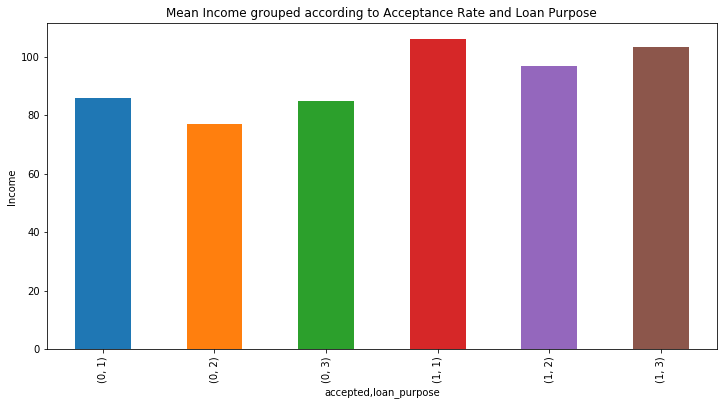

In [71]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','loan_purpose']).mean()['applicant_income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Acceptance Rate and Loan Purpose');

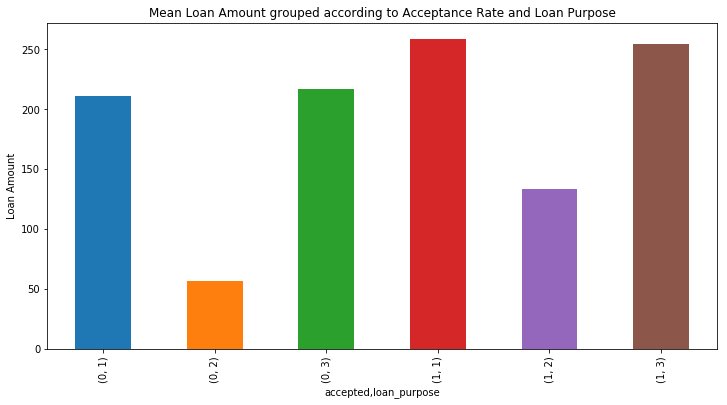

In [77]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','loan_purpose']).mean()['loan_amount'].plot(ax=ax, kind='bar')
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount grouped according to Acceptance Rate and Loan Purpose');

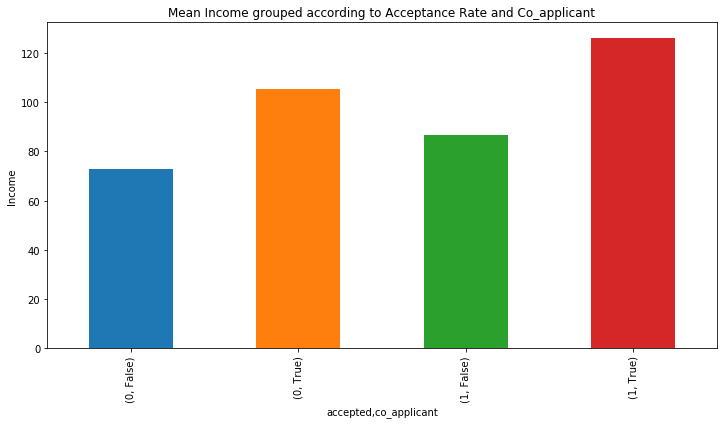

In [72]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','co_applicant']).mean()['applicant_income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Acceptance Rate and Co_applicant');

Text(0.5,1,'Mean Loan Amount grouped according to Acceptance Rate and Co_applicant')

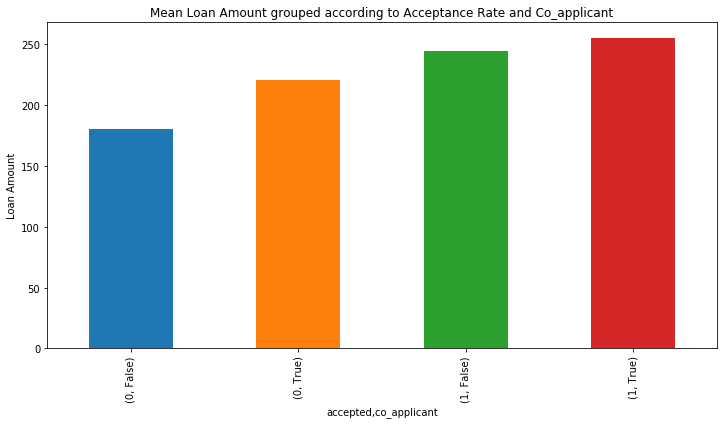

In [78]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','co_applicant']).mean()['loan_amount'].plot(ax=ax, kind='bar')
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount grouped according to Acceptance Rate and Co_applicant')

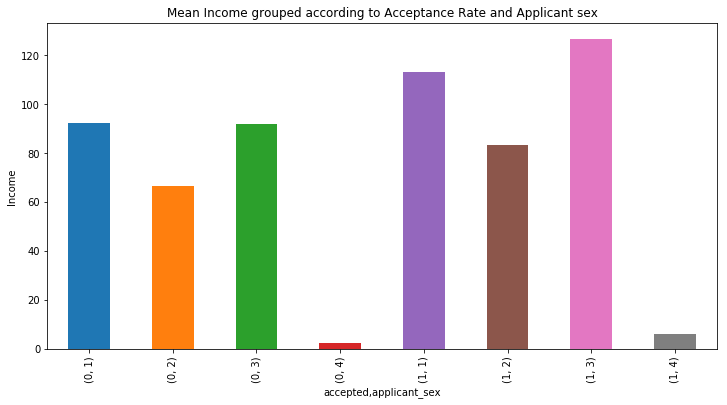

In [73]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','applicant_sex']).mean()['applicant_income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Acceptance Rate and Applicant sex');

Text(0.5,1,'Mean Loan Amount grouped according to Acceptance Rate and Applicant Sex')

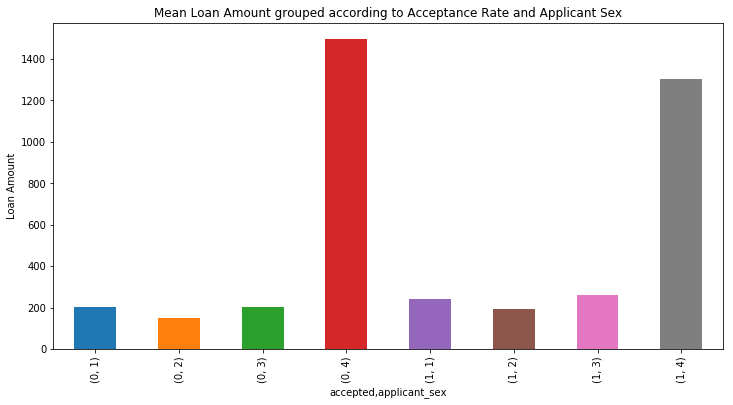

In [79]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','applicant_sex']).mean()['loan_amount'].plot(ax=ax, kind='bar')
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount grouped according to Acceptance Rate and Applicant Sex')

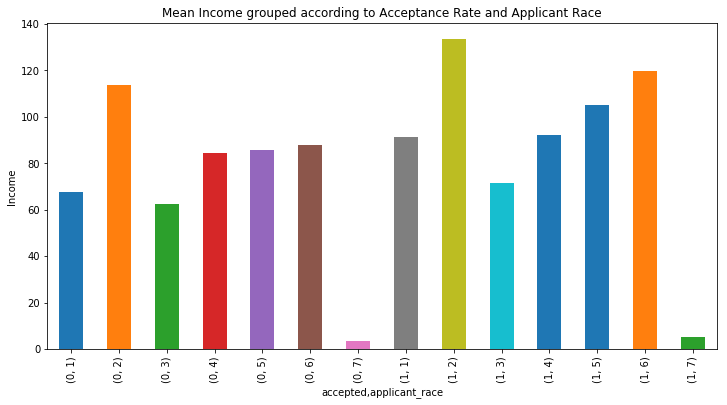

In [75]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','applicant_race']).mean()['applicant_income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Acceptance Rate and Applicant Race');

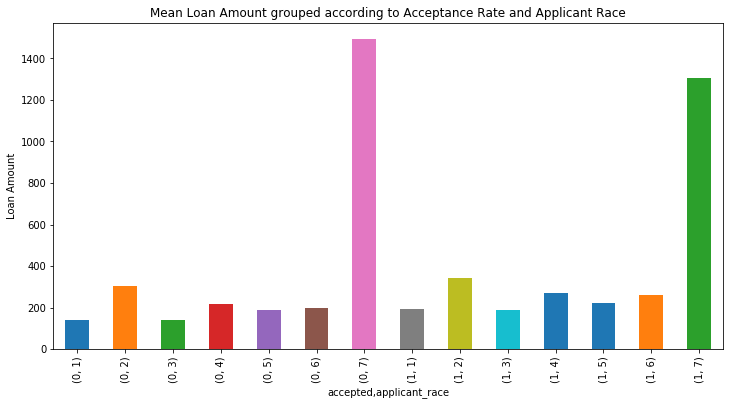

In [80]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','applicant_race']).mean()['loan_amount'].plot(ax=ax, kind='bar')
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount grouped according to Acceptance Rate and Applicant Race');

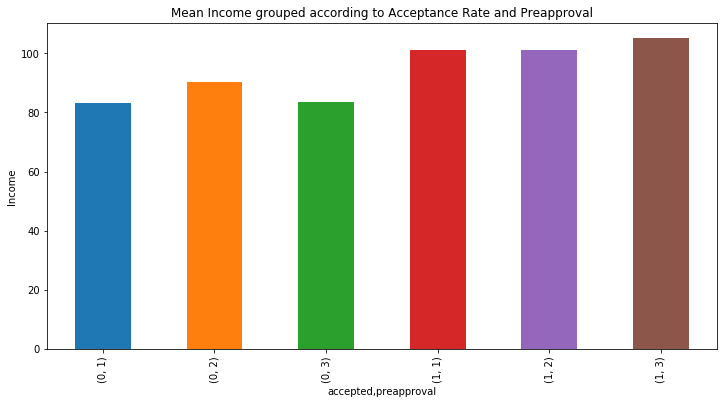

In [81]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','preapproval']).mean()['applicant_income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Acceptance Rate and Preapproval');

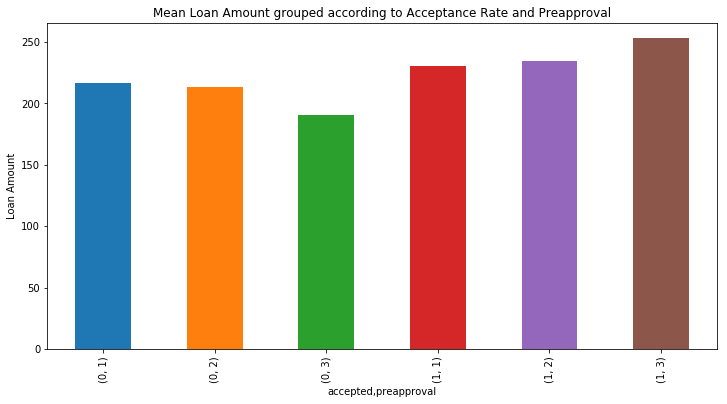

In [82]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','preapproval']).mean()['loan_amount'].plot(ax=ax, kind='bar')
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount grouped according to Acceptance Rate and Preapproval');

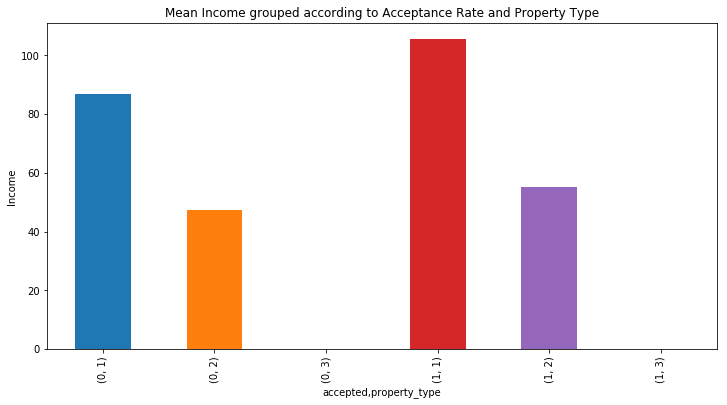

In [83]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','property_type']).mean()['applicant_income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Acceptance Rate and Property Type');

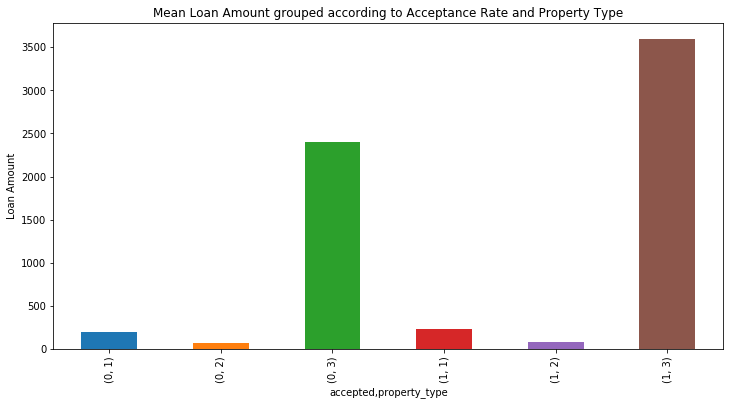

In [84]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','property_type']).mean()['loan_amount'].plot(ax=ax, kind='bar')
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount grouped according to Acceptance Rate and Property Type');

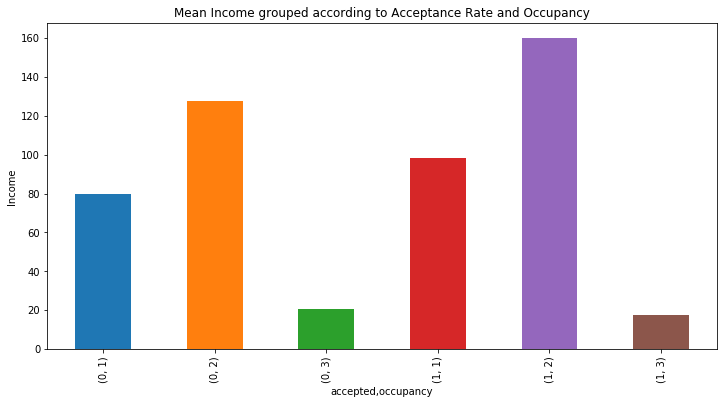

In [85]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','occupancy']).mean()['applicant_income'].plot(ax=ax, kind='bar')
plt.ylabel('Income')
plt.title('Mean Income grouped according to Acceptance Rate and Occupancy');

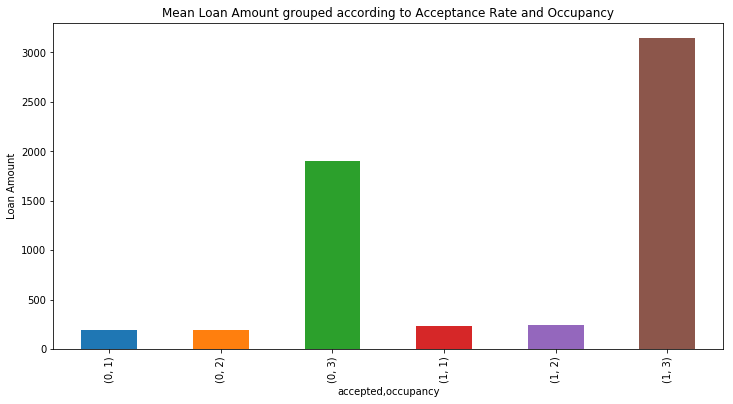

In [86]:
fig, ax = plt.subplots(figsize=(12,6))
data2.groupby(['accepted','occupancy']).mean()['loan_amount'].plot(ax=ax, kind='bar')
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount grouped according to Acceptance Rate and Occupancy');